# Dermatology Disease Classification

## 1. Постановка задачи
### 1.1 Описание проблемы
Цель проекта – построить и протестировать несколько моделей машинного обучения для классификации заболеваний кожи на основе датасета Dermatology Dataset Classification.

### 1.2 Описание данных
Датасет содержит информацию о различных типах заболеваний кожи с соответствующими характеристиками. Основные признаки представлены числовыми данными, а целевая переменная – категориальная.

---


## 2. Подготовка данных
### 2.1 Загрузка данных

In [9]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Загрузка данных
data = pd.read_csv('dermatology_database_1.csv')

# Первичный анализ данных
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   erythema                             366 non-null    int64 
 1   scaling                              366 non-null    int64 
 2   definite_borders                     366 non-null    int64 
 3   itching                              366 non-null    int64 
 4   koebner_phenomenon                   366 non-null    int64 
 5   polygonal_papules                    366 non-null    int64 
 6   follicular_papules                   366 non-null    int64 
 7   oral_mucosal_involvement             366 non-null    int64 
 8   knee_and_elbow_involvement           366 non-null    int64 
 9   scalp_involvement                    366 non-null    int64 
 10  family_history                       366 non-null    int64 
 11  melanin_incontinence                 366 non-

c:\Users\tania\anaconda3\envs\tf_env\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


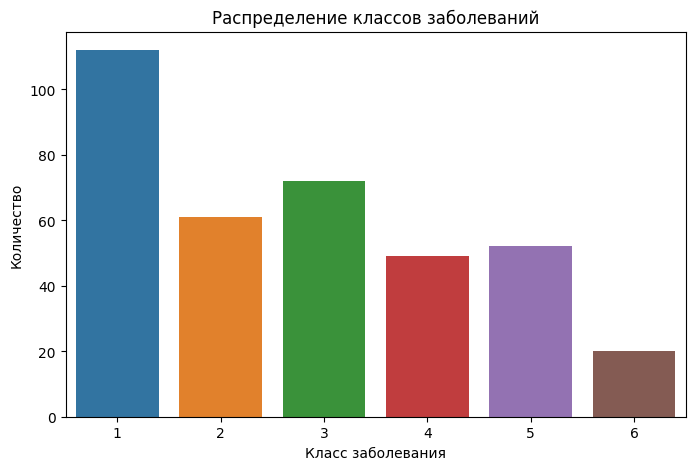

c:\Users\tania\anaconda3\envs\tf_env\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


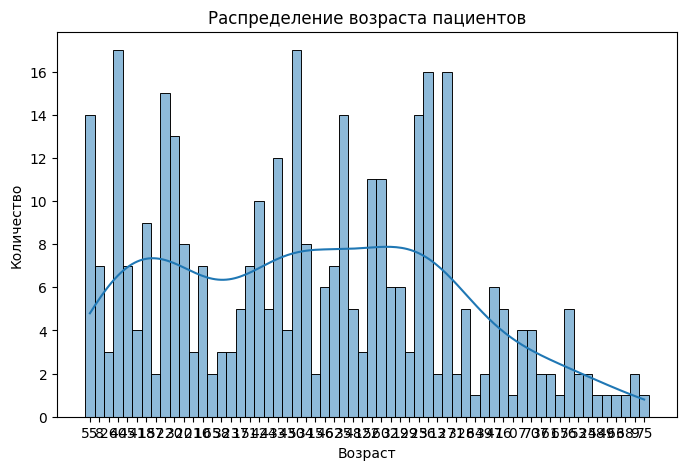

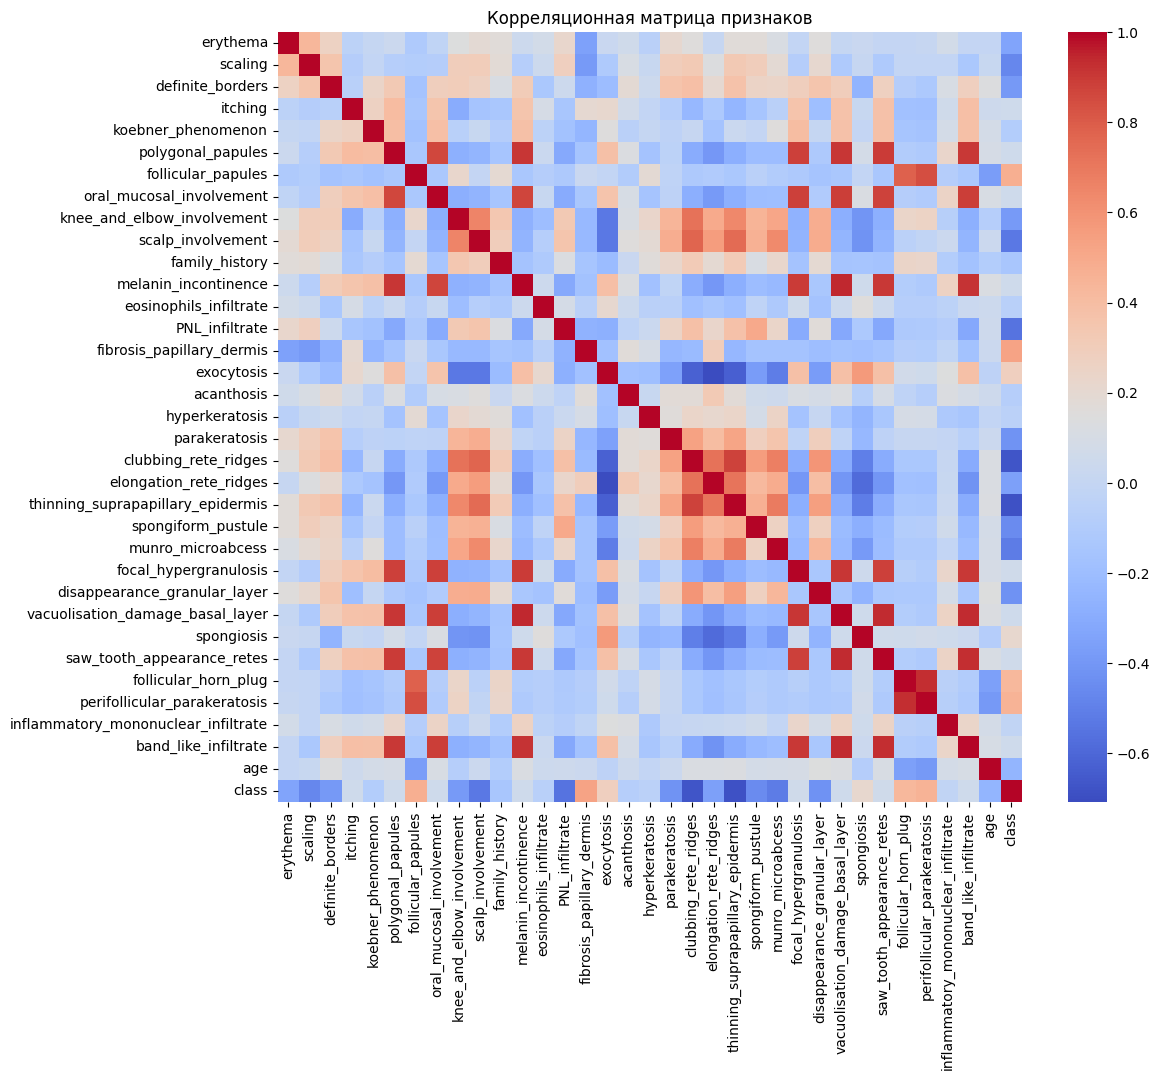

In [18]:
# Замена символов '?' на NaN
data.replace('?', np.nan, inplace=True)

# Преобразование столбца class в категориальный тип
data['class'] = data['class'].astype('category')

# Распределение классов заболеваний
plt.figure(figsize=(8, 5))
sns.countplot(x=data['class'])
plt.title('Распределение классов заболеваний')
plt.xlabel('Класс заболевания')
plt.ylabel('Количество')
plt.show()

# Распределение возраста пациентов
plt.figure(figsize=(8, 5))
sns.histplot(data['age'], kde=True)
plt.title('Распределение возраста пациентов')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

# Корреляционная матрица
numeric_data = data.apply(pd.to_numeric, errors='coerce')
plt.figure(figsize=(12, 10))
corr_matrix = numeric_data.corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Корреляционная матрица признаков')
plt.show()

In [4]:
### 2.2 Предобработка данных
# Преобразование столбца age в числовой тип
data['age'] = pd.to_numeric(data['age'], errors='coerce')

# Обработка пропущенных значений
data.fillna(data['age'].median(), inplace=True)

# Масштабирование числовых признаков
scaler = StandardScaler()
features = data.drop('class', axis=1)
target = data['class']
features_scaled = scaler.fit_transform(features)


In [5]:

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)



## 3. Разработка и тестирование моделей
### 3.1 Базовые модели
#### Логистическая регрессия

In [11]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
logreg_accuracy = accuracy_score(y_test, y_pred_logreg)
print('Логистическая регрессия - Accuracy:', logreg_accuracy)
print(classification_report(y_test, y_pred_logreg))


Логистическая регрессия - Accuracy: 0.9864864864864865
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74



#### Дерево решений

In [12]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)
print('Дерево решений - Accuracy:', dt_accuracy)
print(classification_report(y_test, y_pred_dt))

Дерево решений - Accuracy: 0.972972972972973
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      0.90      0.95        10
           6       1.00      1.00      1.00         3

    accuracy                           0.97        74
   macro avg       0.98      0.96      0.97        74
weighted avg       0.97      0.97      0.97        74



#### Случайный лес

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print('Случайный лес - Accuracy:', rf_accuracy)
print(classification_report(y_test, y_pred_rf))

Случайный лес - Accuracy: 0.9864864864864865
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        31
           2       0.90      1.00      0.95         9
           3       1.00      1.00      1.00        13
           4       1.00      0.88      0.93         8
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00         3

    accuracy                           0.99        74
   macro avg       0.98      0.98      0.98        74
weighted avg       0.99      0.99      0.99        74




## 4. Анализ результатов
## Сравнение моделей

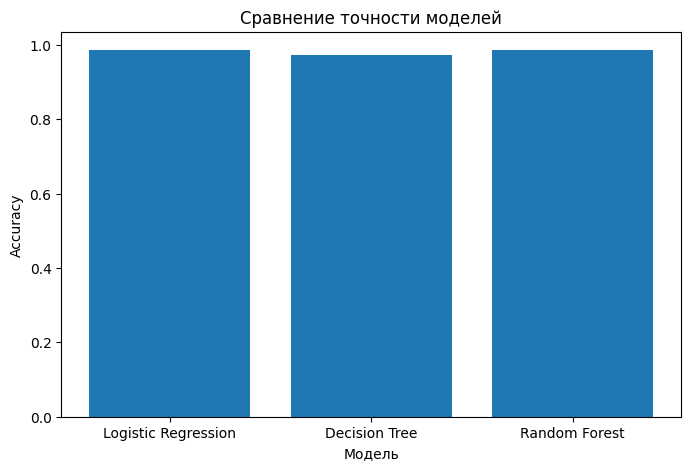

In [14]:
results = {
    'Logistic Regression': logreg_accuracy,
    'Decision Tree': dt_accuracy,
    'Random Forest': rf_accuracy
}

# Визуализация сравнений
plt.figure(figsize=(8, 5))
plt.bar(results.keys(), results.values())
plt.title('Сравнение точности моделей')
plt.xlabel('Модель')
plt.ylabel('Accuracy')
plt.show()

## 5. Анализ результатов
### Матрица ошибок

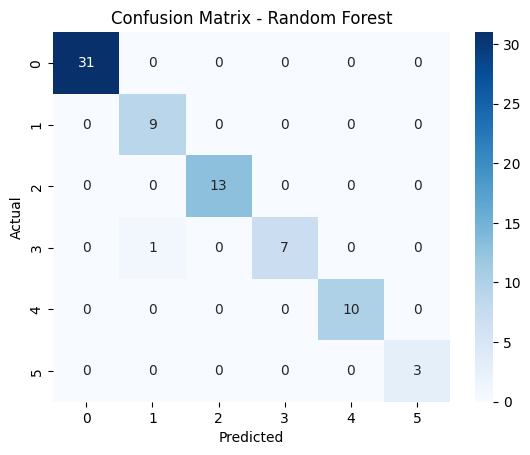

In [16]:
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

## 5. Выводы и рекомендации
1. Проведено тестирование нескольких моделей: логистическая регрессия, дерево решений и случайный лес.
2. Случайный лес показал наилучшие результаты по точности.
3. Для улучшения модели можно провести подбор гиперпараметров и протестировать дополнительные алгоритмы.
